# Market Basket Optimisation

In [87]:
import pandas as pd
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

# Etude du mini dataset

In [3]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

trans_encoder = TransactionEncoder()
one_hot = trans_encoder.fit(dataset).transform(dataset)
data = pd.DataFrame(one_hot, columns=trans_encoder.columns_)
data

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [4]:
frequent_itemSet = apriori(data, min_support=0.5, use_colnames=True)  # Elements d'ensembles fréquents avec 50% de support
frequent_itemSet

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [5]:
rules1 = association_rules(frequent_itemSet, metric = "lift" ,min_threshold = 1.25)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# # Etude du grand Dataset

In [69]:
market_data = pd.read_csv(r'C:\Users\IDEAPAD\Desktop\GOMYCODE\DataSet\Market_Basket_Optimisation.csv', header=None)
market_data.head()

# Header = None => Pour éviter que la première ligne de notre dataset soit considéré comme notre colonne

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
market_data.shape

(7501, 20)

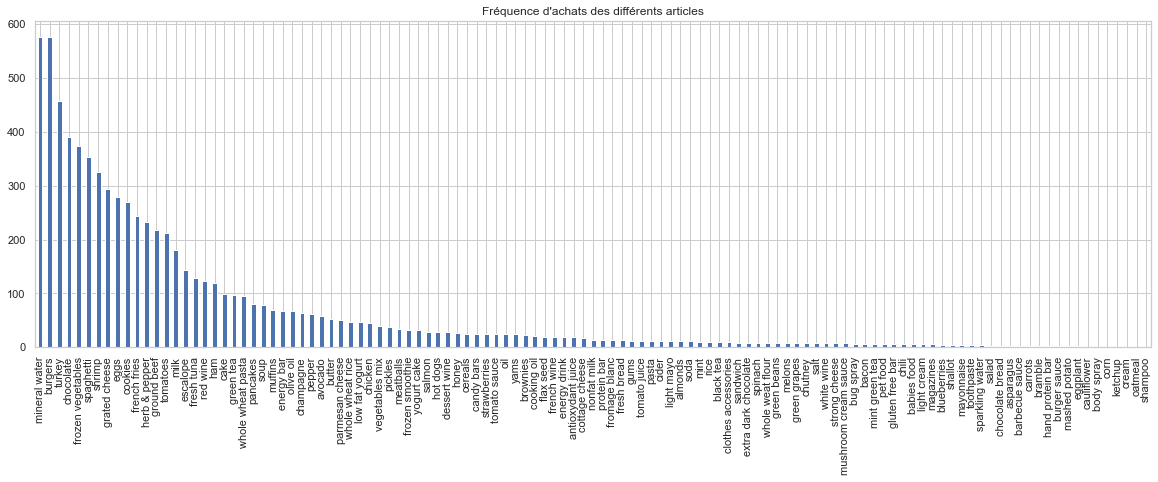

In [115]:
# Recherche des articles les plus payés dans le Market
plt.figure(figsize=(20, 6))
rep = market_data[0].value_counts()
rep.plot.bar()
plt.xticks(rotation = 90)
plt.title("Fréquence d'achats des différents articles" )
plt.show()

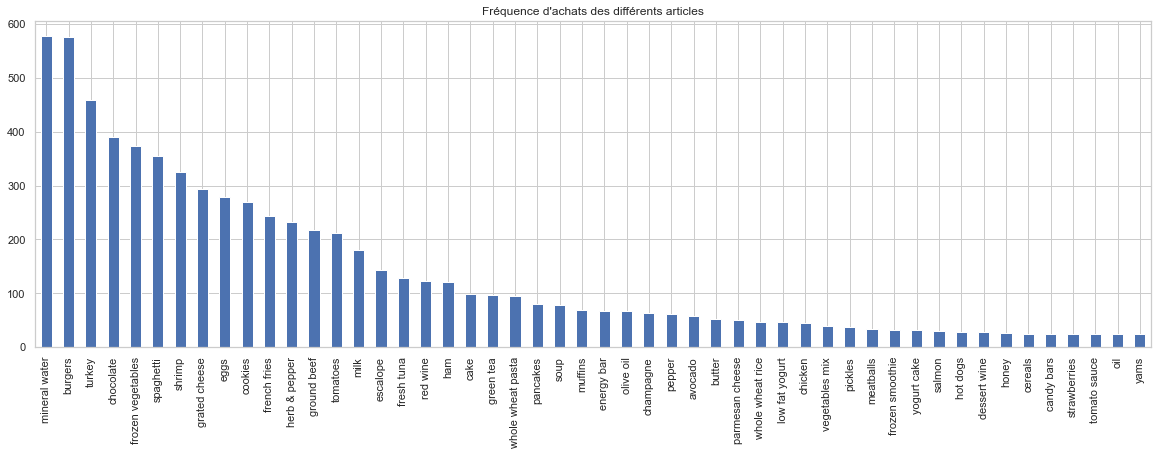

In [125]:
# Utilisation des 50 premiers éléments vu que les autres ne sont presque jamais achetés
plt.figure(figsize=(20, 6))
rep = market_data[0].value_counts().head(50)
rep.plot.bar()
plt.xticks(rotation = 90)
plt.title("Fréquence d'achats des différents articles" )
plt.show()

In [122]:
# Transformation en Tableau Numpy
my_list = []
for i in range(market_data.shape[0]):
    my_list.append([str(market_data.values[i,j]) for j in range(market_data.shape[1])])

tab_numpy = np.array(my_list)
tab_numpy.shape

(7501, 20)

In [123]:
te = TransactionEncoder()
new_market_data = te.fit_transform(tab_numpy)
new_market_data = pd.DataFrame(new_market_data, columns=te.columns_)
new_market_data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [124]:
new_market_data.shape

(7501, 121)

In [126]:
new_market_data = new_market_data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                                            'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                                            'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                                            'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                                            'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                                            'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake',
                                         'salmon', 'hot dogs', 'dessert wine', 'honey', 'cereals', 'candy bars', 'strawberries', 'tomato sauce', 'oil', 'yams']]
new_market_data.shape

(7501, 50)

In [138]:
new_market_data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,salmon,hot dogs,dessert wine,honey,cereals,candy bars,strawberries,tomato sauce,oil,yams
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
itemSets = apriori(new_market_data, min_support=0.01, use_colnames=True)
itemSets

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
218,0.010132,"(ground beef, mineral water, eggs)"
219,0.013065,"(milk, mineral water, eggs)"
220,0.011065,"(ground beef, mineral water, milk)"
221,0.010532,"(spaghetti, chocolate, eggs)"


In [142]:
# Confidence
association_rules(itemSets, metric='confidence', min_threshold=0.01) # Association avec plus de 10% de proba

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
1,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
2,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
3,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
...,...,...,...,...,...,...,...,...,...
415,"(chocolate, spaghetti)",(milk),0.039195,0.129583,0.010932,0.278912,2.152382,0.005853,1.207088
416,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821
417,(spaghetti),"(chocolate, milk)",0.174110,0.032129,0.010932,0.062787,1.954217,0.005338,1.032712
418,(milk),"(chocolate, spaghetti)",0.129583,0.039195,0.010932,0.084362,2.152382,0.005853,1.049329


In [143]:
# Lift
association_rules(itemSets, metric = 'lift', min_threshold=1.25 )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
1,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
2,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
3,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
4,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
...,...,...,...,...,...,...,...,...,...
317,"(chocolate, spaghetti)",(milk),0.039195,0.129583,0.010932,0.278912,2.152382,0.005853,1.207088
318,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821
319,(spaghetti),"(chocolate, milk)",0.174110,0.032129,0.010932,0.062787,1.954217,0.005338,1.032712
320,(milk),"(chocolate, spaghetti)",0.129583,0.039195,0.010932,0.084362,2.152382,0.005853,1.049329
